## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [60]:
# Your code here - remember to use markdown cells for comments as well!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,r2_score
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

%matplotlib inline


In [61]:
df = pd.read_csv('data\kc_house_data.csv',parse_dates=["date"])
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Data Preparation and Cleaning

In [62]:
# Lets check the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  object        
 9   view           21534 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

#####  Our data has got 21 columns , 21,597 rows,

#####  We can see missing values in waterfront, yr_built and view 

###  Dealing with missing values

In [63]:
# We are going to use .isna() to check on missing values
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [64]:
df.shape

(21597, 21)

In [65]:
# Finding the sum of missing values in each column
Null_count = df.isna().sum()
Null_count

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [66]:
# Getting the percentage of the missing  values in each column
Per_Null_count = (Null_count/df.shape[0])*100
Per_Null_count

id                0.000000
date              0.000000
price             0.000000
bedrooms          0.000000
bathrooms         0.000000
sqft_living       0.000000
sqft_lot          0.000000
floors            0.000000
waterfront       11.001528
view              0.291707
condition         0.000000
grade             0.000000
sqft_above        0.000000
sqft_basement     0.000000
yr_built          0.000000
yr_renovated     17.789508
zipcode           0.000000
lat               0.000000
long              0.000000
sqft_living15     0.000000
sqft_lot15        0.000000
dtype: float64

##### We drop rows with missing records since the percentage is very minimal  hence won't effect our data

In [67]:

df['yr_renovated'].fillna(0, inplace=True)

In [68]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [69]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [70]:
imputer = SimpleImputer(strategy="constant",fill_value="missing")
view = df[["view"]]
view_imputed = imputer.fit_transform(view)
df['view'] = view_imputed


In [71]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
missing         63
Name: view, dtype: int64

In [72]:
df['condition'].value_counts()

Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

In [73]:
conditions = {
    "Poor": 0,
    "Fair"   : 1,
    "Average" :    2,
    "Good": 3,
    "Very Good"   :  4
    
}
df["House_condition"] = df["condition"].replace(conditions).astype(int)

In [74]:
views = {
    "missing": 0,
    "NONE"   : 1,
    "FAIR" :    2,
    "AVERAGE": 3,
    "GOOD"   :  4,
    "EXCELLENT" : 5
}
df["view_imputed"] = df["view"].replace(views).astype(int)

In [75]:
df['grade'].value_counts()

7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

In [76]:
 df['House_Grading'] = df['grade'].str.split().apply(lambda x: x[0]).astype(int)
    

In [77]:
df.corr()['price']

id                -0.016772
price              1.000000
bedrooms           0.308787
bathrooms          0.525906
sqft_living        0.701917
sqft_lot           0.089876
floors             0.256804
sqft_above         0.605368
yr_built           0.053953
yr_renovated       0.117855
zipcode           -0.053402
lat                0.306692
long               0.022036
sqft_living15      0.585241
sqft_lot15         0.082845
House_condition    0.036056
view_imputed       0.391223
House_Grading      0.667951
Name: price, dtype: float64

In [78]:
df['waterfront'].fillna('NAN', inplace=True)

In [79]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,House_condition,view_imputed,House_Grading
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NAN,NONE,...,1955,0.0,98178,47.5112,-122.257,1340,5650,2,1,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1951,1991.0,98125,47.7210,-122.319,1690,7639,2,1,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,1933,0.0,98028,47.7379,-122.233,2720,8062,2,1,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,1965,0.0,98136,47.5208,-122.393,1360,5000,4,1,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,1987,0.0,98074,47.6168,-122.045,1800,7503,2,1,8
5,7237550310,2014-05-12,1230000.0,4,4.50,5420,101930,1.0,NO,NONE,...,2001,0.0,98053,47.6561,-122.005,4760,101930,2,1,11
6,1321400060,2014-06-27,257500.0,3,2.25,1715,6819,2.0,NO,NONE,...,1995,0.0,98003,47.3097,-122.327,2238,6819,2,1,7
7,2008000270,2015-01-15,291850.0,3,1.50,1060,9711,1.0,NO,missing,...,1963,0.0,98198,47.4095,-122.315,1650,9711,2,0,7
8,2414600126,2015-04-15,229500.0,3,1.00,1780,7470,1.0,NO,NONE,...,1960,0.0,98146,47.5123,-122.337,1780,8113,2,1,7
9,3793500160,2015-03-12,323000.0,3,2.50,1890,6560,2.0,NO,NONE,...,2003,0.0,98038,47.3684,-122.031,2390,7570,2,1,7


In [80]:
df['waterfront'].value_counts()

NO     19075
NAN     2376
YES      146
Name: waterfront, dtype: int64

In [81]:
#Group the DataFrame by 'zipcode' and calculate the mode for 'waterfront' within each group
#mode_waterfront_by_zipcode = df.groupby('zipcode')['waterfront'].apply(lambda x: x.mode().iloc[0])

# Fill missing 'waterfront' values based on the 'zipcode' mode
#df['waterfront'] = df.apply(lambda row: mode_waterfront_by_zipcode[row['zipcode']] if pd.isna(row['waterfront']) else row['waterfront'], axis=1)

In [82]:
df.isna().sum()

id                 0
date               0
price              0
bedrooms           0
bathrooms          0
sqft_living        0
sqft_lot           0
floors             0
waterfront         0
view               0
condition          0
grade              0
sqft_above         0
sqft_basement      0
yr_built           0
yr_renovated       0
zipcode            0
lat                0
long               0
sqft_living15      0
sqft_lot15         0
House_condition    0
view_imputed       0
House_Grading      0
dtype: int64

In [83]:
#To drop long and lat columns , because it wont effect our data analysis and model builting
df.drop('long',axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,sqft_living15,sqft_lot15,House_condition,view_imputed,House_Grading
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NAN,NONE,...,0.0,1955,0.0,98178,47.5112,1340,5650,2,1,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,47.7210,1690,7639,2,1,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,47.7379,2720,8062,2,1,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,47.5208,1360,5000,4,1,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,47.6168,1800,7503,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,47.6993,1530,1509,2,1,8
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,47.5107,1830,7200,2,1,8
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,47.5944,1020,2007,2,1,7
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NAN,NONE,...,0.0,2004,0.0,98027,47.5345,1410,1287,2,1,8


In [84]:
df.drop('lat',axis=1)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,long,sqft_living15,sqft_lot15,House_condition,view_imputed,House_Grading
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NAN,NONE,...,0.0,1955,0.0,98178,-122.257,1340,5650,2,1,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,400.0,1951,1991.0,98125,-122.319,1690,7639,2,1,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,1933,0.0,98028,-122.233,2720,8062,2,1,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,910.0,1965,0.0,98136,-122.393,1360,5000,4,1,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,1987,0.0,98074,-122.045,1800,7503,2,1,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,0.0,2009,0.0,98103,-122.346,1530,1509,2,1,8
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,0.0,2014,0.0,98146,-122.362,1830,7200,2,1,8
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,0.0,2009,0.0,98144,-122.299,1020,2007,2,1,7
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,NAN,NONE,...,0.0,2004,0.0,98027,-122.069,1410,1287,2,1,8


In [85]:
# Checking on outliers
#df.describe()

In [86]:
#df.hist('bathrooms', bins='auto')

In [87]:
#Q1= np.percentile(df['bathrooms'],25)
#Q1

In [88]:
#Q3 = np.percentile(df['bathrooms'],75)
#Q3

In [89]:
#Inter_range = Q3 - Q1
#Inter_range

In [90]:
#lower_bound = Q1-1.5*Inter_range
#lower_bound

In [91]:
#upper_bound = Q3+1.5*Inter_range
#upper_bound

In [92]:
#df=df[(df['bathrooms'] >= lower_bound) & (df['bathrooms'] <= upper_bound)]
#df

###### Dealing with outliers in bedrooms column

In [93]:
#Q1 = np.percentile(df['bedrooms'],25)
#Q1

In [94]:
#Q3 = np.percentile(df['bedrooms'],75)
#Q3


In [95]:
#Inter_range = Q3 - Q1
#Inter_range

In [96]:
#lower_bound = Q1-1.5 *Inter_range
#lower_bound

In [97]:
#upper_bound = Q3 + 1.5 *Inter_range
#upper_bound

In [98]:
#df = df[(df['bedrooms'] >= lower_bound) & (df['bedrooms'] <= upper_bound)]
#df

In [99]:
#df.hist('bathrooms',bins='auto')

In [100]:
#df.hist('bedrooms', bins='auto')

In [101]:
df['Age'] = df['date'].dt.year

In [102]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,House_condition,view_imputed,House_Grading,Age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NAN,NONE,...,0.0,98178,47.5112,-122.257,1340,5650,2,1,7,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,1991.0,98125,47.7210,-122.319,1690,7639,2,1,7,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,0.0,98028,47.7379,-122.233,2720,8062,2,1,6,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,0.0,98136,47.5208,-122.393,1360,5000,4,1,7,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,0.0,98074,47.6168,-122.045,1800,7503,2,1,8,2015


In [103]:
df["Age_House"] = df['Age'] - df['yr_built']

In [104]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,House_condition,view_imputed,House_Grading,Age,Age_House
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,NAN,NONE,...,98178,47.5112,-122.257,1340,5650,2,1,7,2014,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,98125,47.7210,-122.319,1690,7639,2,1,7,2014,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,98028,47.7379,-122.233,2720,8062,2,1,6,2015,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,98136,47.5208,-122.393,1360,5000,4,1,7,2014,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,98074,47.6168,-122.045,1800,7503,2,1,8,2015,28


In [105]:
df.corr()["price"]

id                -0.016772
price              1.000000
bedrooms           0.308787
bathrooms          0.525906
sqft_living        0.701917
sqft_lot           0.089876
floors             0.256804
sqft_above         0.605368
yr_built           0.053953
yr_renovated       0.117855
zipcode           -0.053402
lat                0.306692
long               0.022036
sqft_living15      0.585241
sqft_lot15         0.082845
House_condition    0.036056
view_imputed       0.391223
House_Grading      0.667951
Age                0.003727
Age_House         -0.053890
Name: price, dtype: float64

## EDA

#### To  find correlation analysis of our numeric variables ,

In [106]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,House_condition,view_imputed,House_Grading,Age,Age_House
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.010799,0.021617,-0.010612,-0.008211,-0.001798,0.020672,-0.002701,-0.138557,-0.023803,0.012577,0.008188,0.009915,-0.021458
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.605368,0.053953,0.117855,-0.053402,0.306692,0.022036,0.585241,0.082845,0.036056,0.391223,0.667951,0.003727,-0.053890
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,0.479386,0.155670,0.017900,-0.154092,-0.009951,0.132054,0.393406,0.030690,0.026496,0.077842,0.356563,-0.009949,-0.155817
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.686668,0.507173,0.047177,-0.204786,0.024280,0.224903,0.569884,0.088303,-0.126479,0.185148,0.665838,-0.026577,-0.507561
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.876448,0.318152,0.051060,-0.199802,0.052155,0.241214,0.756402,0.184342,-0.059445,0.279993,0.762779,-0.029014,-0.318592
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.184139,0.052946,0.004979,-0.129586,-0.085514,0.230227,0.144763,0.718204,-0.008830,0.074505,0.114731,0.005628,-0.052853
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.523989,0.489193,0.003793,-0.059541,0.049239,0.125943,0.280102,-0.010722,-0.264075,0.028381,0.458794,-0.022352,-0.489514
sqft_above,-0.010799,0.605368,0.479386,0.686668,0.876448,0.184139,0.523989,1.000000,0.424037,0.020645,-0.261570,-0.001199,0.344842,0.731767,0.195077,-0.158904,0.165352,0.756073,-0.023782,-0.424386
yr_built,0.021617,0.053953,0.155670,0.507173,0.318152,0.052946,0.489193,0.424037,1.000000,-0.202555,-0.347210,-0.148370,0.409993,0.326377,0.070777,-0.361592,-0.054139,0.447865,0.003574,-0.999873
yr_renovated,-0.010612,0.117855,0.017900,0.047177,0.051060,0.004979,0.003793,0.020645,-0.202555,1.000000,0.062397,0.027970,-0.064543,0.000683,0.004286,-0.055808,0.090398,0.015623,-0.019713,0.202227


<AxesSubplot:>

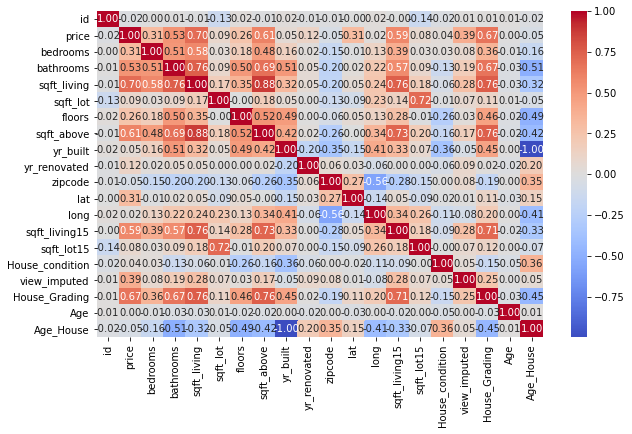

In [107]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm', annot=True,fmt=".2f" )

In [108]:
#Lets  check on how numeric variables are correlated to the price
df_corr = df.corr()['price'].sort_values(ascending=False)
df_corr

price              1.000000
sqft_living        0.701917
House_Grading      0.667951
sqft_above         0.605368
sqft_living15      0.585241
bathrooms          0.525906
view_imputed       0.391223
bedrooms           0.308787
lat                0.306692
floors             0.256804
yr_renovated       0.117855
sqft_lot           0.089876
sqft_lot15         0.082845
yr_built           0.053953
House_condition    0.036056
long               0.022036
Age                0.003727
id                -0.016772
zipcode           -0.053402
Age_House         -0.053890
Name: price, dtype: float64

<bound method PlotAccessor.scatter of <pandas.plotting._core.PlotAccessor object at 0x0000020BE9D5A4F0>>

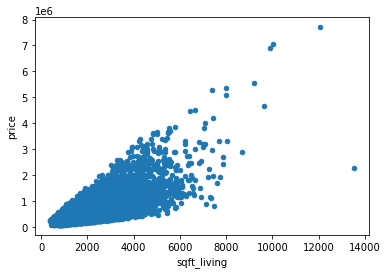

In [109]:
df.plot.scatter(x='sqft_living', y='price')
df.plot.scatter

### The sqft_living is highly correlated to price


<AxesSubplot:xlabel='price', ylabel='Count'>

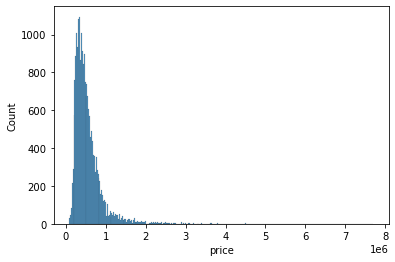

In [110]:
sns.histplot(data=df,x="price")

#### Modelling

#### <ins> Baseline Model</ins>

In [111]:
#Lets  built a baseline model using sqft_living as our predictor and price our target
import statsmodels.api as sm
y = df['price']
X = df[['sqft_living']]
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        08:59:59   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.399e+04   4410.023     -9.975      

In [112]:
"""
The model is statistically significant,explaining 43% of variation in sales.
One increase in sqft_living , increases the price by 244 dollars.
The confidence interval(doesnt contain zero), hence sqft_living  has statistical significant effect on price
With a coefficient of 23280 ,means that sqft_living 0,the estimated value(price),is 23380
"""


'\nThe model is statistically significant,explaining 43% of variation in sales.\nOne increase in sqft_living , increases the price by 244 dollars.\nThe confidence interval(doesnt contain zero), hence sqft_living  has statistical significant effect on price\nWith a coefficient of 23280 ,means that sqft_living 0,the estimated value(price),is 23380\n'

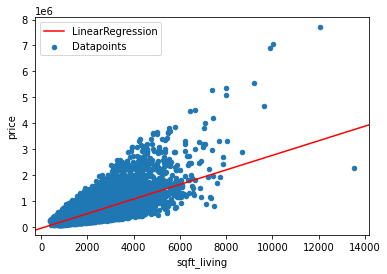

In [113]:
fig, ax = plt.subplots()
df.plot(x='sqft_living',y='price', label="Datapoints",kind='scatter',ax=ax)
sm.graphics.abline_plot(model_results=baseline_results,label="LinearRegression", c="red", ax=ax)
plt.legend()
plt.show()

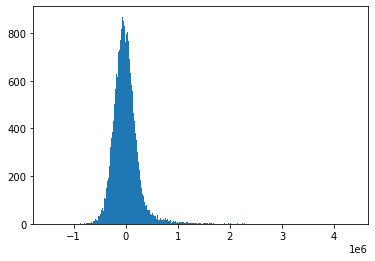

In [114]:
#Lets check on the distribution of error
plt.hist(baseline_results.resid, bins='auto')
plt.show()

In [115]:
# the histogram shows the errors are normally distributed,


## Building Multiple Linear Regression
###### To improve the accuracy of our baseline model

In [116]:
y = np.log(df['price'])
X = df[['sqft_living','lat','Age_House','bathrooms','House_Grading','House_condition','view_imputed']]
baseline_model = sm.OLS(y, sm.add_constant(X))
baseline_results = baseline_model.fit()
print(baseline_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.755
Model:                            OLS   Adj. R-squared:                  0.755
Method:                 Least Squares   F-statistic:                     9489.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:00:00   Log-Likelihood:                -1616.8
No. Observations:               21597   AIC:                             3250.
Df Residuals:                   21589   BIC:                             3313.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const             -53.7994      0.631    -

In [119]:
y = df['price']
X_copy = X.copy()

for col in X_copy:
    X_copy[col] = (X_copy[col] - X_copy[col].mean()) / X_copy[col].std()

X_copy.describe()

,sqft_living,lat,Age_House,bathrooms,House_Grading,House_condition,view_imputed
count,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04,2.159700e+04
mean,-1.421283e-16,-1.721504e-14,-2.105604e-17,1.158082e-16,3.948008e-16,1.105442e-16,5.264011e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.862880e+00,-2.917271e+00,-1.508760e+00,-2.101247e+00,-3.970267e+00,-3.704314e+00,-1.603035e+00
25%,-7.083297e-01,-6.423086e-01,-8.620023e-01,-4.757266e-01,-5.607873e-01,-6.299719e-01,-3.000336e-01
50%,-1.855143e-01,8.449553e-02,-1.131243e-01,1.744818e-01,-5.607873e-01,-6.299719e-01,-3.000336e-01
75%,5.115728e-01,8.509960e-01,6.697935e-01,4.995859e-01,2.915825e-01,9.071993e-01,-3.000336e-01
max,1.248187e+01,1.569861e+00,2.439869e+00,7.651878e+00,4.553432e+00,2.444371e+00,4.911971e+00


In [120]:
standardized_model = sm.OLS(y, sm.add_constant(X_copy))
standardized_results = standardized_model.fit()
print(standardized_results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     6246.
Date:                Wed, 25 Oct 2023   Prob (F-statistic):               0.00
Time:                        09:06:13   Log-Likelihood:            -2.9544e+05
No. Observations:               21597   AIC:                         5.909e+05
Df Residuals:                   21589   BIC:                         5.910e+05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            5.403e+05   1437.476    3